Title Of the Project:


**Bank Customer Churn Model**

**Objective**- The objective of a bank churn model in Python is to predict and reduce customer churn. Utilizing machine learning techniques, the model aims to identify patterns and factors contributing to customer attrition, enabling proactive measures such as personalized retention strategies, enhancing customer satisfaction, and ultimately improving the bank's customer retention rates.

**Data Source **- YBI Foundation

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
df=pd.read_csv('/content/Customer-Churn-Records.csv')
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
# EDL(Exploratory Data Analysis)

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [4]:
df.size

180000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
df.describe(include='object')

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [8]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [9]:
for col in df.describe():
  print(col)
  print(df[col].unique())
  print('-'*50)

RowNumber
[    1     2     3 ...  9998  9999 10000]
--------------------------------------------------
CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
--------------------------------------------------
CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 

In [10]:
for a in df.describe(include='object'):
  print(a)
  print(df[a].unique())
  print('-'*55)

Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
-------------------------------------------------------
Geography
['France' 'Spain' 'Germany']
-------------------------------------------------------
Gender
['Female' 'Male']
-------------------------------------------------------
Card Type
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
-------------------------------------------------------


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'RowNumber'),
  Text(2, 0, 'CustomerId'),
  Text(3, 0, 'CreditScore'),
  Text(4, 0, 'Age'),
  Text(5, 0, 'Tenure'),
  Text(6, 0, 'Balance'),
  Text(7, 0, 'NumOfProducts'),
  Text(8, 0, 'HasCrCard'),
  Text(9, 0, 'IsActiveMember'),
  Text(10, 0, 'EstimatedSalary'),
  Text(11, 0, 'Exited'),
  Text(12, 0, 'Complain'),
  Text(13, 0, 'Satisfaction Score'),
  Text(14, 0, 'Point Earned')])

<Figure size 3000x2400 with 0 Axes>

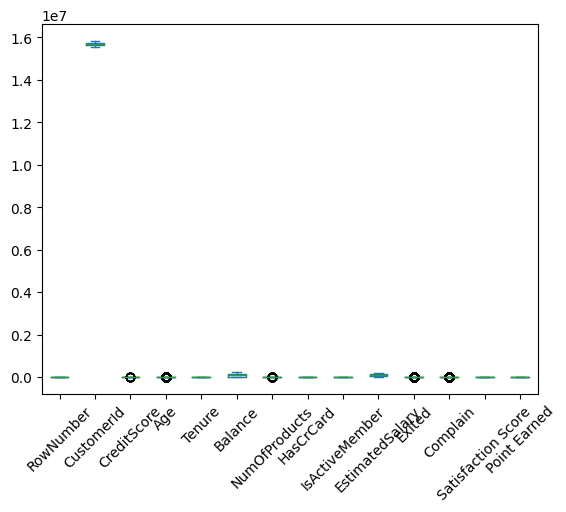

In [11]:
# Data Visualization

plt.figure(figsize=(30,24))
df.plot.box()
plt.xticks(rotation=45)

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016140,-0.016957,0.009289,0.002360
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515


<ipython-input-13-55830759f167>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<Axes: >

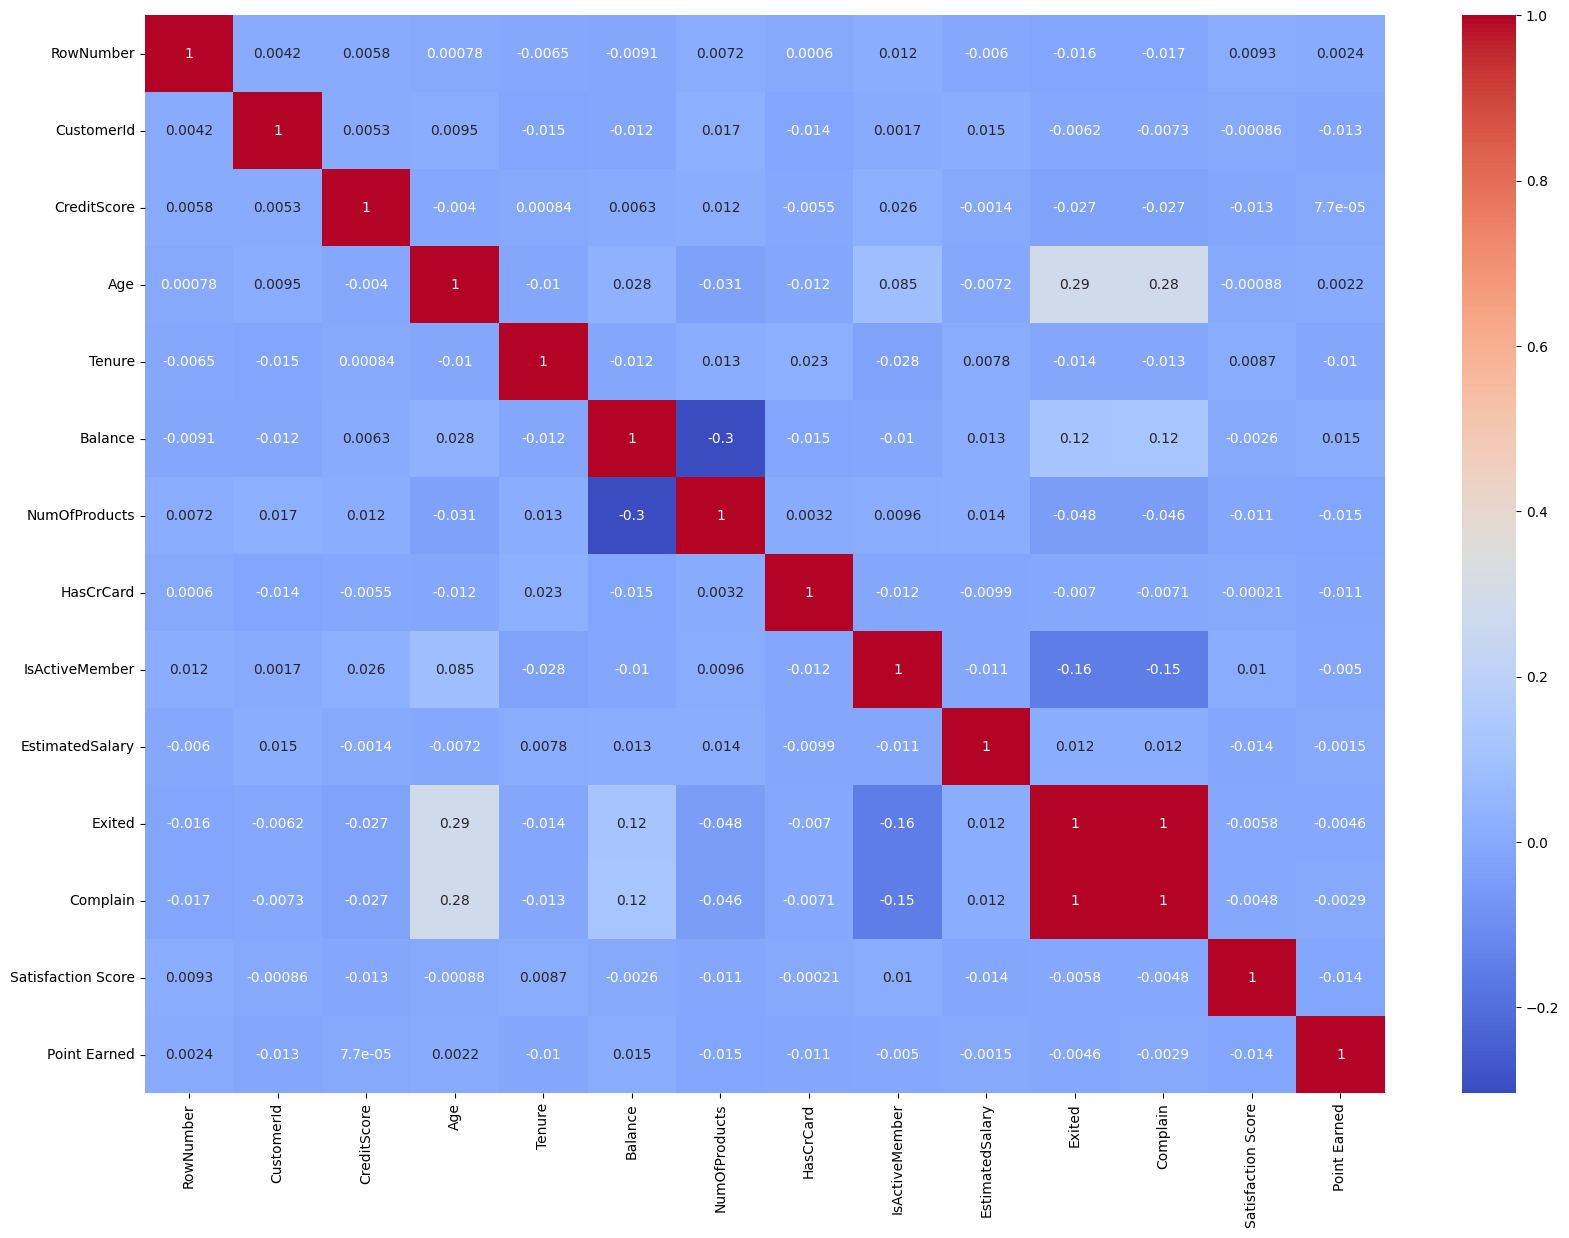

In [13]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [14]:
df['Exited'].nunique()

2

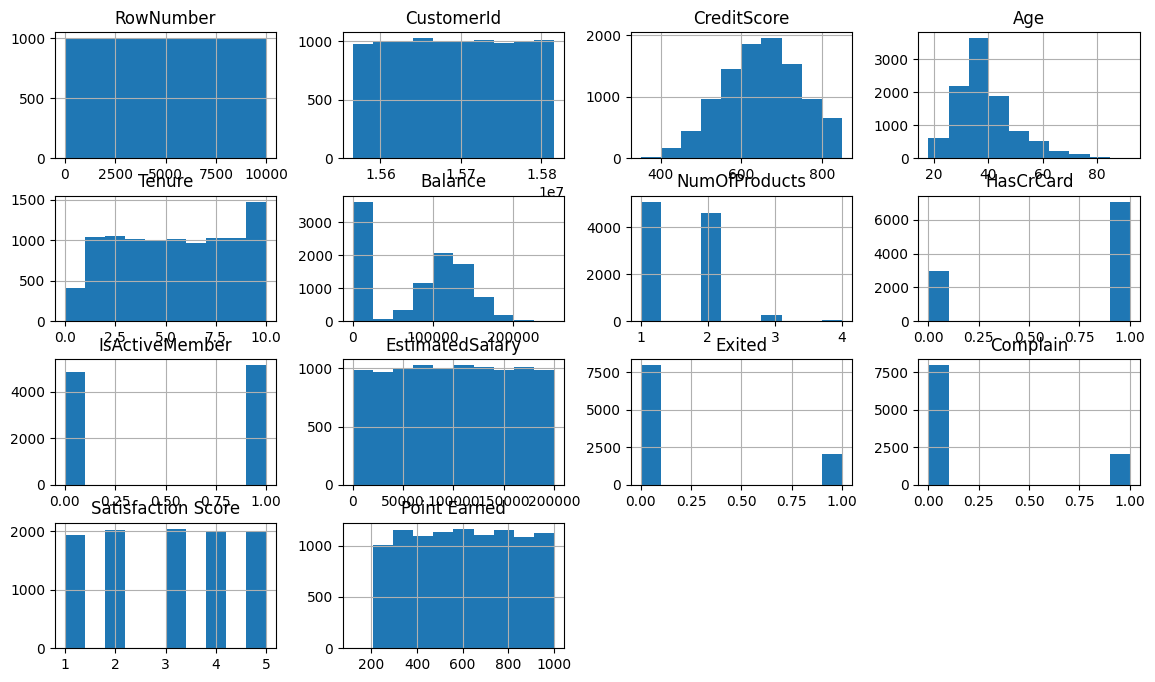

In [15]:
df.hist(figsize=(14,8))
plt.show()

In [16]:
a=df['Exited'].value_counts()
a

0    7962
1    2038
Name: Exited, dtype: int64

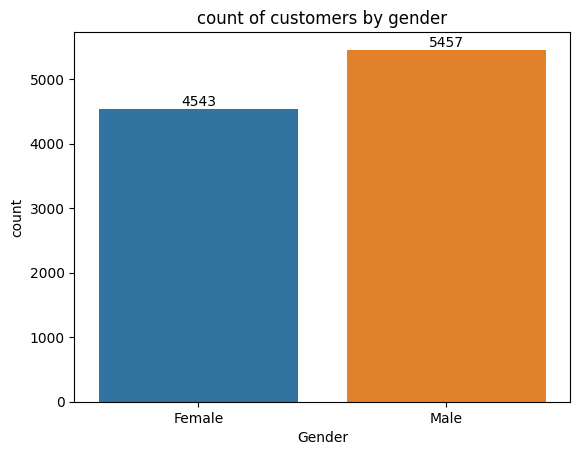

In [17]:
a=sns.countplot(data=df,x='Gender')
plt.title('count of customers by gender')
for label in a.containers:
  a.bar_label(label)
plt.show()



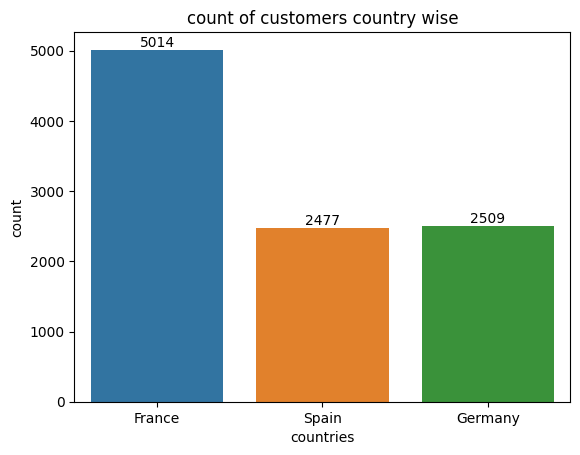

In [18]:
y=sns.countplot(data=df,x='Geography')
plt.title('count of customers country wise')
plt.xlabel('countries')
for label in y.containers:
  y.bar_label(label)
plt.show()

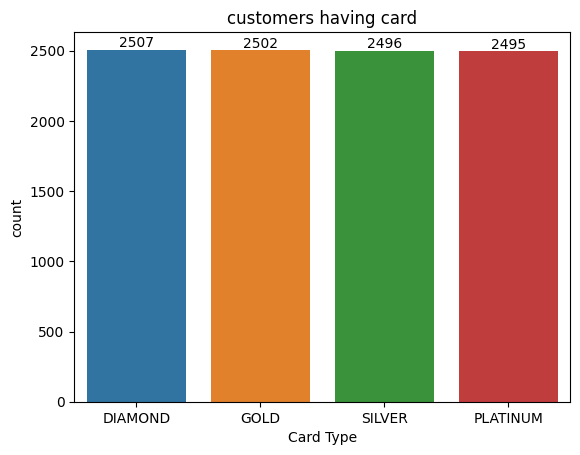

In [19]:
z=sns.countplot(data=df,x='Card Type')
plt.title('customers having card')
for label in z.containers:
  z.bar_label(label)
plt.show()

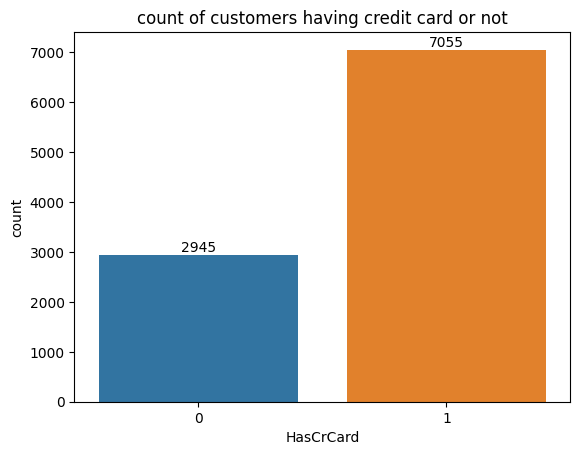

In [20]:
x=sns.countplot(data=df,x='HasCrCard')
plt.title('count of customers having credit card or not')
for i in x.containers:
  x.bar_label(i)
plt.show()

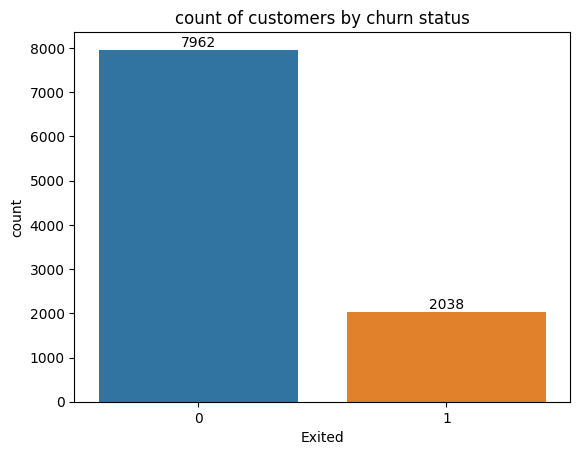

In [21]:
y=sns.countplot(data=df,x='Exited')
plt.title('count of customers by churn status')
for i in y.containers:
  y.bar_label(i)
plt.show()

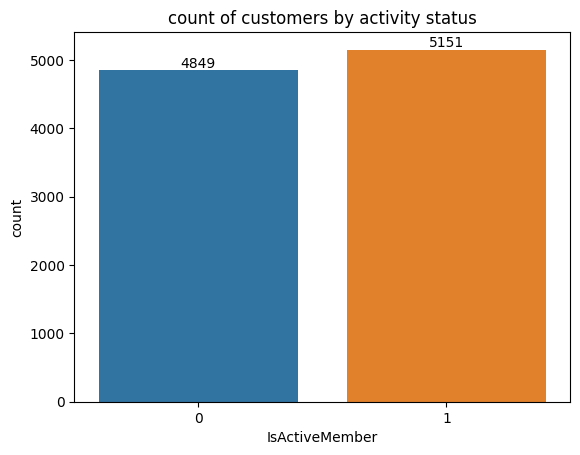

In [22]:
y=sns.countplot(data=df,x='IsActiveMember')
plt.title('count of customers by activity status')
for i in y.containers:
  y.bar_label(i)
plt.show()

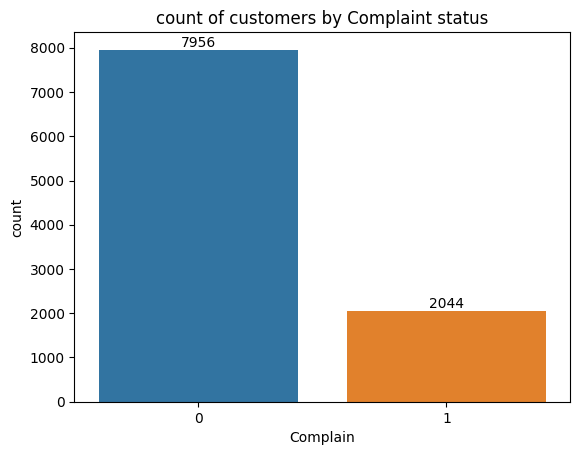

In [23]:
y=sns.countplot(data=df,x='Complain')
plt.title('count of customers by Complaint status')
for i in y.containers:
  y.bar_label(i)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'RowNumber'),
  Text(1, 0, 'CustomerId'),
  Text(2, 0, 'CreditScore'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'Tenure'),
  Text(5, 0, 'Balance'),
  Text(6, 0, 'NumOfProducts'),
  Text(7, 0, 'HasCrCard'),
  Text(8, 0, 'IsActiveMember'),
  Text(9, 0, 'EstimatedSalary'),
  Text(10, 0, 'Complain'),
  Text(11, 0, 'Satisfaction Score'),
  Text(12, 0, 'Point Earned')])

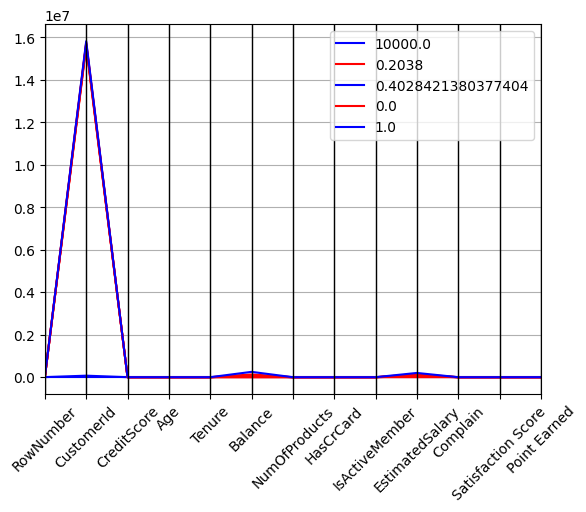

In [24]:
pd.plotting.parallel_coordinates(df.describe(),'Exited',color='br')
plt.xticks(rotation=45)

In [25]:
avg_balance_churned = df[df['Exited'] == 1]['Balance'].mean()
avg_balance_retained = df[df['Exited'] == 0]['Balance'].mean()
print('Average Balance - Churned:', avg_balance_churned)
print('Average Balance - Retained:', avg_balance_retained)

Average Balance - Churned: 91109.47600588812
Average Balance - Retained: 72742.75066314996


In [26]:
churned_customers = df.query('Exited == 1')
churned_customers
nonchurned_customers=df.query('Exited==0')
nonchurned_customers

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,5,DIAMOND,715
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,4,PLATINUM,311
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771


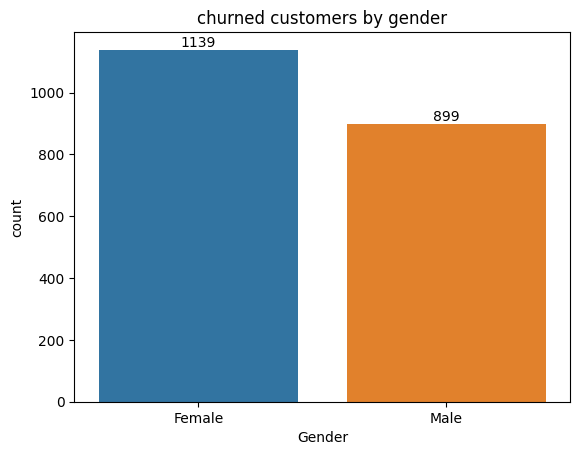

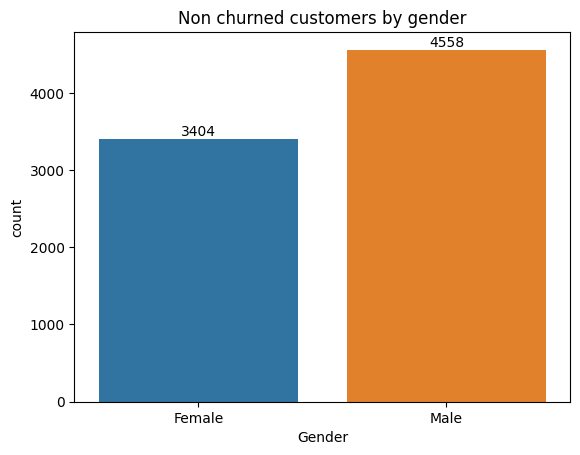

In [27]:
x=sns.countplot(data=churned_customers,x='Gender')
plt.title('churned customers by gender')
for i in x.containers:
  x.bar_label(i)
plt.show(x)
y=sns.countplot(data=nonchurned_customers,x='Gender')
plt.title('Non churned customers by gender')
for i in y.containers:
  y.bar_label(i)
plt.show(y)

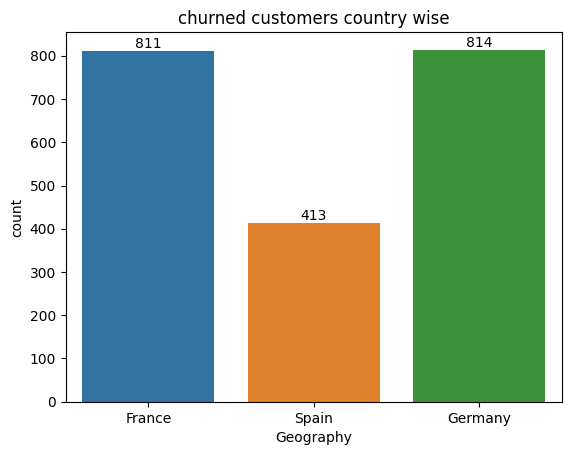

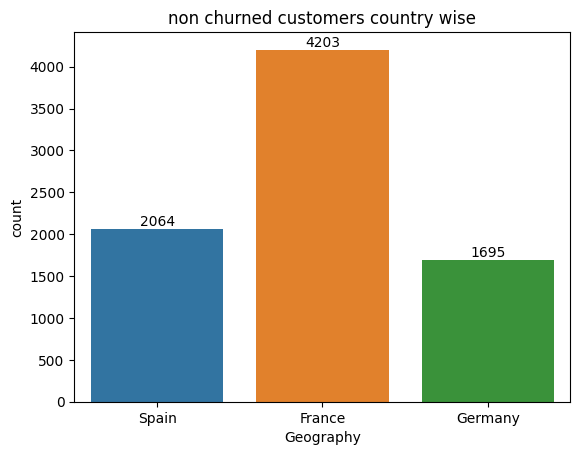

In [28]:
x=sns.countplot(data=churned_customers,x='Geography')
plt.title('churned customers country wise')
for i in x.containers:
  x.bar_label(i)
plt.show(x)
y=sns.countplot(data=nonchurned_customers,x='Geography')
plt.title('non churned customers country wise')
for i in y.containers:
  y.bar_label(i)
plt.show(y)

In [29]:
credit_card=df.query('HasCrCard==1')
credit_card
no_credit_card=df.query('HasCrCard==0')
no_credit_card

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0,0,3,GOLD,264
13,14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0,0,3,PLATINUM,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,9981,15719276,T'ao,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0,0,2,SILVER,295
9983,9984,15656710,Cocci,613,France,Male,40,4,0.00,1,0,0,151325.24,0,0,5,PLATINUM,828
9986,9987,15581736,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0,0,5,PLATINUM,772
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,4,PLATINUM,311


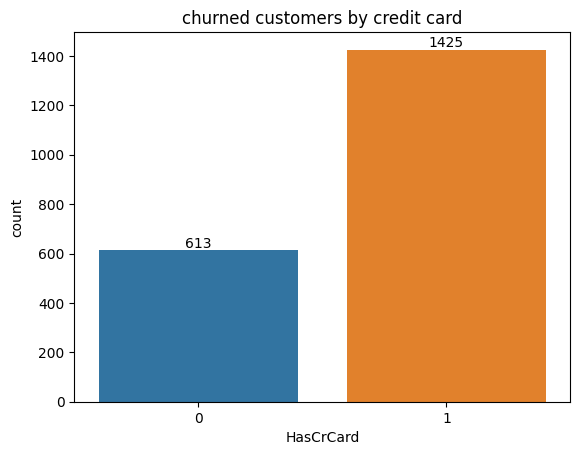

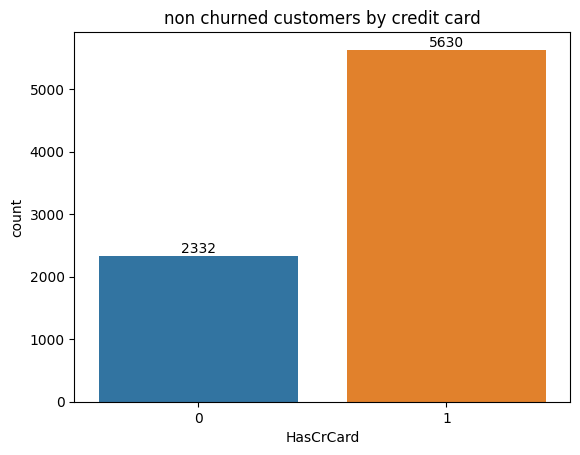

In [30]:
x=sns.countplot(data=churned_customers,x='HasCrCard')
plt.title('churned customers by credit card')
for i in x.containers:
  x.bar_label(i)
plt.show()
y=sns.countplot(data=nonchurned_customers,x='HasCrCard')
plt.title('non churned customers by credit card')
for i in y.containers:
  y.bar_label(i)
plt.show()

In [31]:
# importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [73]:
# Train-Test Split
# Define Target Variable (y) and Feature Variables (X)

x=df.drop(['Exited','Surname','Geography','Gender','Card Type','Age','EstimatedSalary','Complain','Satisfaction Score','Card Type','Point Earned'],axis=1)
y=df['Exited']
x_test,y_test,x_train,y_train=train_test_split(x,y,test_size=0.25,random_state=42)
x_test,y_test,x_train,y_train

(      RowNumber  CustomerId  CreditScore  Tenure    Balance  NumOfProducts  \
 4901       4902    15575935          673       0  178058.06              2   
 4375       4376    15616555          850       8   60880.68              1   
 6698       6699    15784491          725       6       0.00              1   
 9805       9806    15704597          644       7  174571.36              1   
 1101       1102    15782219          703       9       0.00              2   
 ...         ...         ...          ...     ...        ...            ...   
 5734       5735    15596647          768       8   69712.74              1   
 5191       5192    15681075          682       1       0.00              1   
 5390       5391    15573851          735       1       0.00              3   
 860         861    15807663          667       8  190227.46              1   
 7270       7271    15706268          697       1  147910.30              1   
 
       HasCrCard  IsActiveMember  
 4901          

In [74]:
print(df.dtypes)

RowNumber                int64
CustomerId               int64
Surname                 object
CreditScore              int64
Geography             category
Gender                category
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Exited                   int64
Complain                 int64
Satisfaction Score       int64
Card Type               object
Point Earned             int64
dtype: object


In [75]:
x_train=x_train.to_numpy()
x_train=x_train.reshape(-1,1)

In [76]:
# Modeling
model=LogisticRegression()
model.fit(x_train[:2500],y_train)

LogisticRegression()

In [ ]:
# Prediction

prediction=model.predict(x_test)
print(prediction)

In [ ]:
accuracy=accuracy_score(prediction.y_test)
print(accuracy)

In [ ]:
percentage=f'{accuracy:.0%}'
percentage

Recommendations for the Bank:


Improve Customer Satisfaction: Conduct regular customer satisfaction surveys to identify pain points and areas for improvement. Addressing customer concerns promptly and effectively can help reduce churn rates.

Enhance Customer Retention Programs: Develop loyalty programs, personalized offers, and rewards to incentivize customers to stay with the bank. Building strong relationships and providing value-added services can increase customer loyalty.

Focus on Retaining Female Customers: Analyze the reasons behind the higher churn rate among female customers. Tailor marketing and customer service strategies to meet their specific needs and preferences.

Strengthen Communication Channels: Ensure effective communication channels are in place to keep customers informed about new products, services, and updates. Regularly engage with customers through personalized interactions and provide timely support.

Offer Targeted Financial Solutions: Analyze the needs and preferences of customers within the age group of 45-70. Provide tailored financial solutions, such as retirement planning, investment options, and specialized services, to meet their unique requirements.

Targeted Marketing: Leverage the insights about customer segments with higher salaries to tailor marketing strategies and offerings specifically for this group. This can strengthen relationships, increase loyalty, and reduce the likelihood of customer churn.

Provide Value-added Products and Services: Continuously assess the market to identify emerging trends and offer innovative products and services that differentiate the bank from competitors. Regularly review and update existing offerings to remain competitive.

Foster Trust and Transparency: Build trust and transparency through clear communication, fair pricing, and reliable services. Ensure customers feel valued and have confidence in the bank's integrity and commitment to their financial well-being.

Complaint Resolution: Improve the complaint resolution process by actively addressing customer complaints, providing prompt and satisfactory solutions, and enhancing customer support channels. This can help reduce churn rates associated with unresolved complaints.

Focus on Customer Education: Offer financial literacy programs and educational resources to empower customers to make informed decisions. Educated customers are more likely to remain loyal and satisfied with the bank's services.

By implementing these recommendations, the bank can strengthen customer relationships, increase customer satisfaction, and ultimately reduce churn rates. Regular monitoring and analysis of customer behavior and feedback will help refine strategies and further improve customer retention efforts.
